In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [161]:
df=pd.read_csv("data/heart_disease.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [185]:

corr_matrix=df.corr()["target"].abs().sort_values(ascending=False).drop("target")
print(corr_matrix)
abs_correlation=corr_matrix.index[:2]
print("\nTwo most correlated features with target are:\n 1.",abs_correlation[0], " \n 2.", abs_correlation[1])

ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64

Two most correlated features with target are:
 1. ST slope  
 2. exercise angina


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Decision Plot Boundaries Function

In [164]:
def plot_decision_boundaries(X, y, classifier, feature_names, model_name):
    plt.figure(figsize=(8, 8))
    
    colors = ['green', 'lime']
    cmap = ListedColormap(['darkorange', 'gold'])
    
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X, response_method="predict",
        xlabel=feature_names[0], ylabel=feature_names[1],
        alpha=0.7, grid_resolution=100, cmap=cmap
    )
    
    scatter = disp.ax_.scatter(
        X[:, 0], X[:, 1], 
        c=y, cmap=ListedColormap(colors),
        s=120, edgecolor='k', linewidth=1.5, alpha=0.8
    )
    
    plt.title(model_name)
    legend_labels = {0: 'Outcome 0', 1: 'Outcome 1'}
    handles, _ = scatter.legend_elements()
    plt.legend(handles, legend_labels.values(), loc="upper left", title="Outcome")
    
    plt.tight_layout()
    plt.show()

### Training and testing models

In [165]:

features = ["ST slope", "exercise angina"]
X = df[features].values 
y = df['target'].values

In [166]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logistic))
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_decision_tree))

Accuracy Logistic Regression: 0.8151260504201681
Accuracy Decision Tree: 0.8123249299719888


<Figure size 800x800 with 0 Axes>

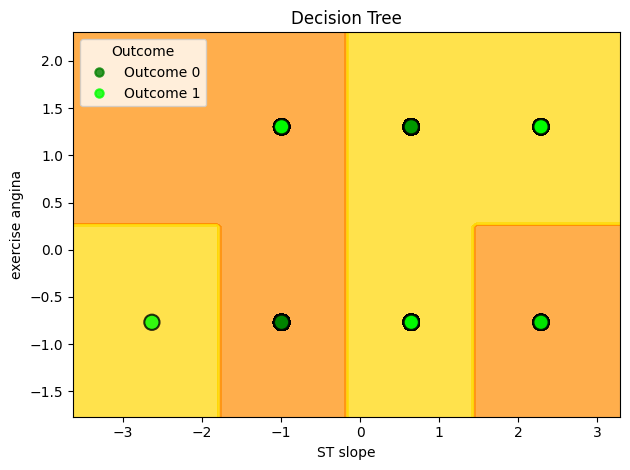

<Figure size 800x800 with 0 Axes>

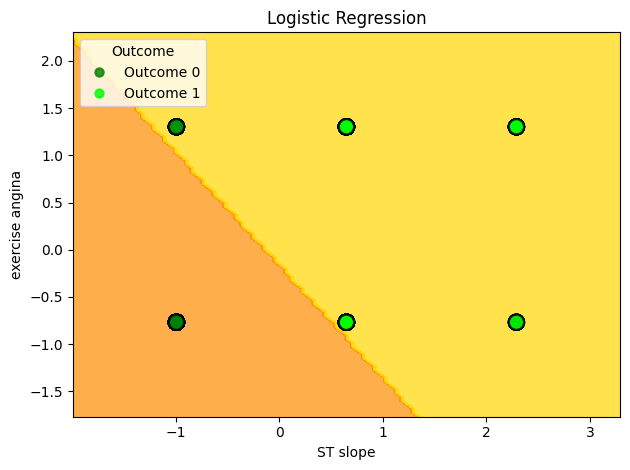

In [167]:

plot_decision_boundaries(X_train_scaled, y_train, decision_tree_model, features, "Decision Tree")

plot_decision_boundaries(X_test_scaled, y_test, logistic_model, features, "Logistic Regression")


In [168]:
print("\nExplanation for the reduced number of visible points:")
print(f"Total number of examples: {len(X)}")
print(f"Number of unique values for {features[0]}: {len(np.unique(df[features[0]]))}")
print(f"Number of unique values for {features[1]}: {len(np.unique(df[features[1]]))}")


Explanation for the reduced number of visible points:
Total number of examples: 1190
Number of unique values for ST slope: 4
Number of unique values for exercise angina: 2


## 📑Results
From these plots it can be seen that logistic regression divides the data more simply and is not so complex.

We only have 7 unique points that overlap each other.

Decision Tree has binary decisions, meaning in its case it is not possible for the result obtained to be closer to 1 or 0,it is stricly or 1 or 0

Although Decision Tree seems more complex visually, each region corresponds to a clear rule

## Studying Hyperparameters

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def plot_hyperparameter_effect(param_name, param_range, X_train, X_test, y_train, y_test, ax, random_state=42):
    test_scores = []
    
    for value in param_range:
        params = {param_name: value, 'random_state': random_state}
        model = DecisionTreeClassifier(**params)
        model.fit(X_train, y_train)
        
        # Accuracy only for test set
        test_scores.append(model.score(X_test, y_test))
    
    x_labels = [str(val) if val is not None else "None" for val in param_range]
    
    ax.plot(range(len(param_range)), test_scores, 'o-', color='orange', linewidth=2)
    
    # Find best value
    best_idx = np.argmax(test_scores)
    best_value = param_range[best_idx]
    best_score = test_scores[best_idx]
    
    # Mark in plot best value
    ax.plot(best_idx, best_score, 'r*', markersize=12)
    
    ax.set_title(f'Effect of {param_name}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Test Accuracy')
    ax.set_xticks(range(len(param_range))[::max(1, len(param_range)//5)])
    ax.set_xticklabels([x_labels[i] for i in range(len(param_range))[::max(1, len(param_range)//5)]], rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    return best_value, best_score


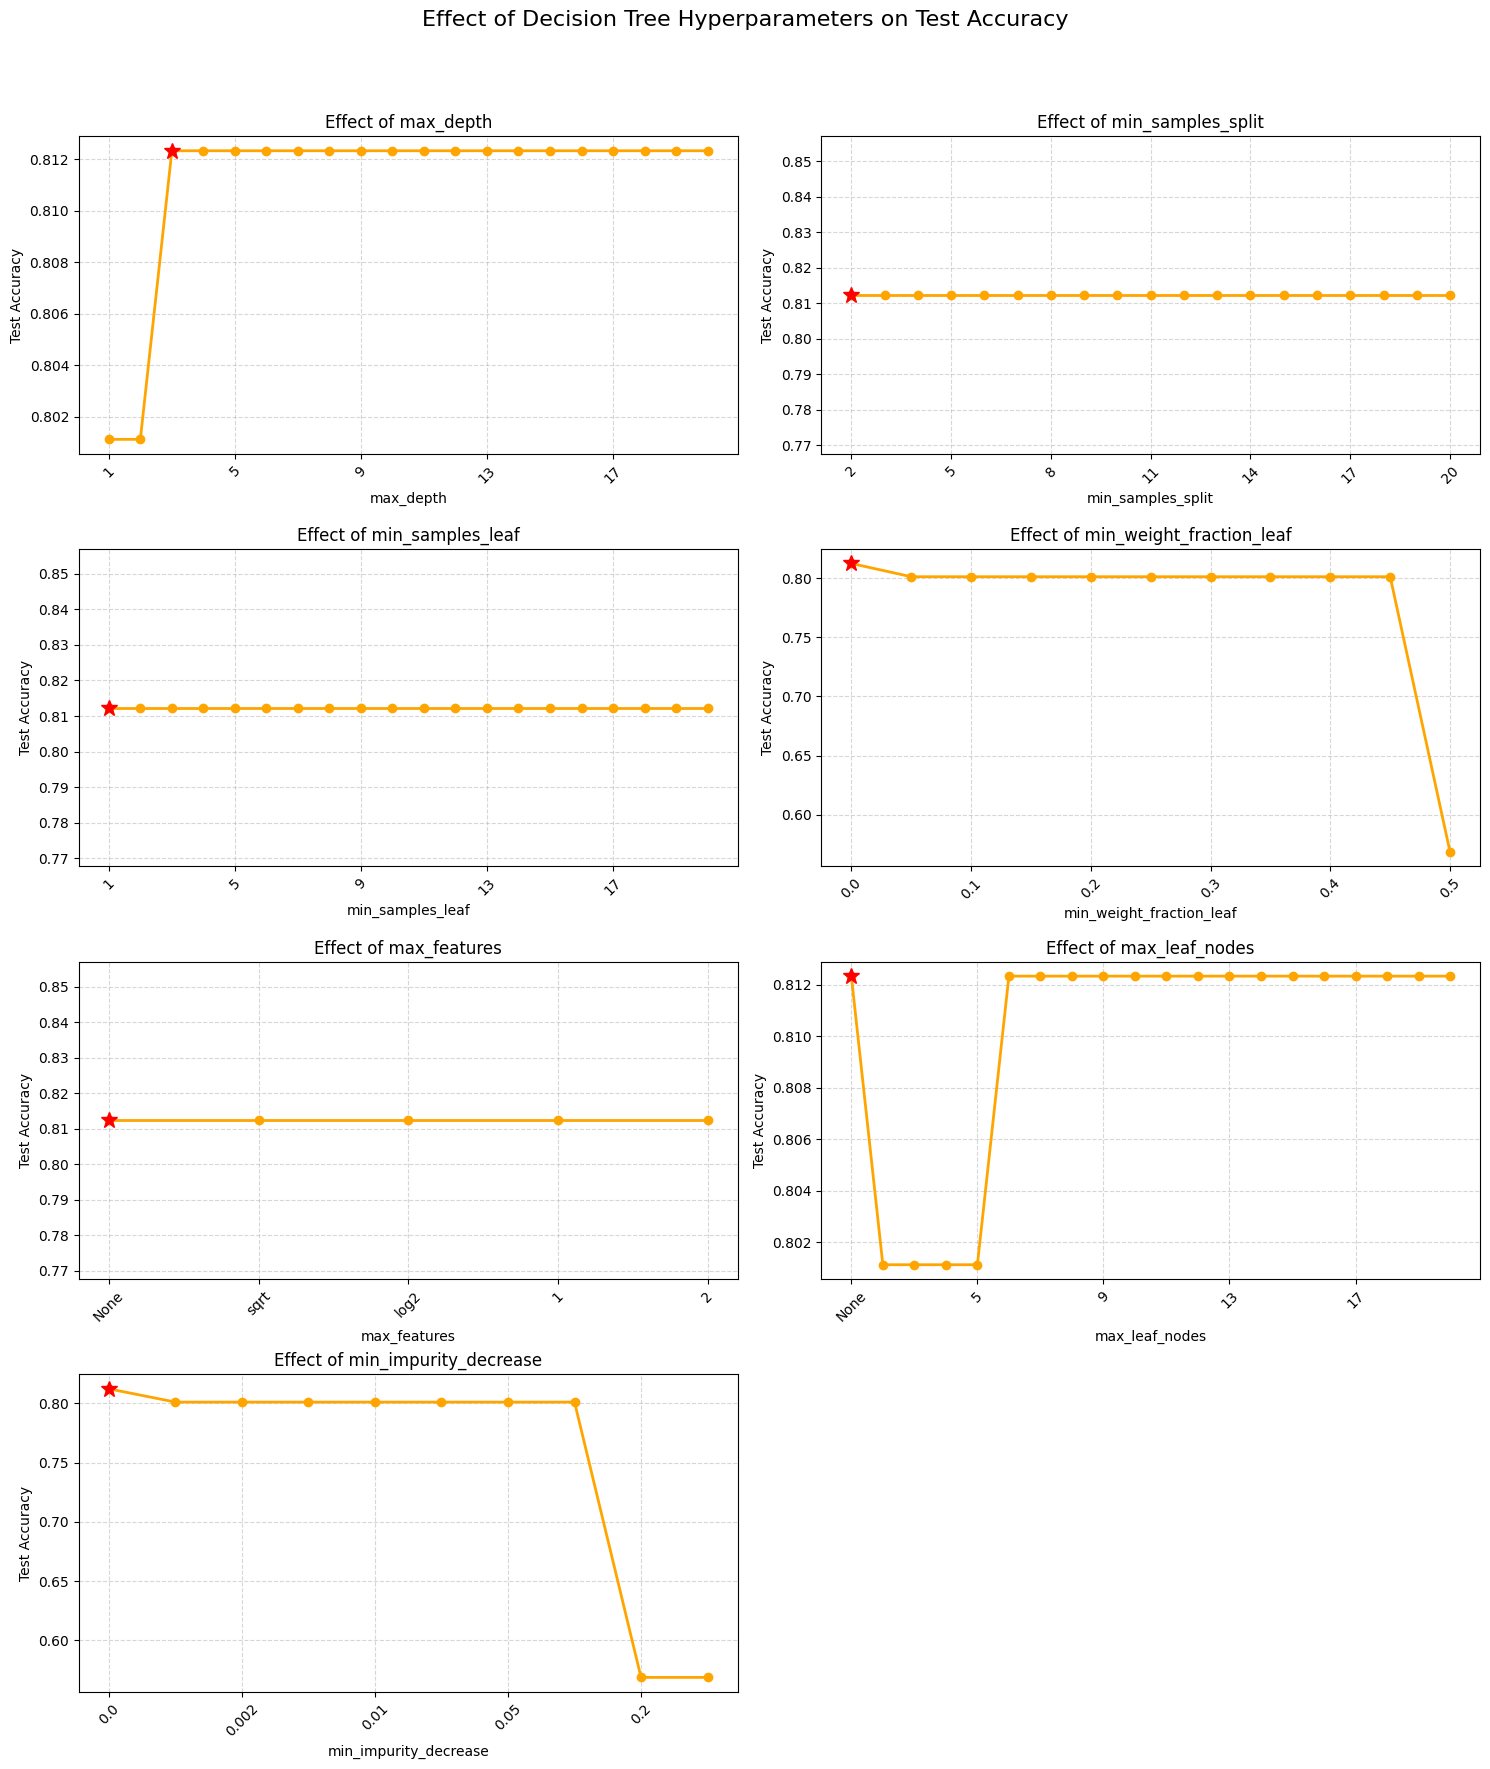

In [170]:
hyperparameters = {
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'min_weight_fraction_leaf': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'max_features': [None, 'sqrt', 'log2'] + list(range(1, X_train.shape[1] + 1)),
    'max_leaf_nodes': [None] + list(range(2, 21)),
    'min_impurity_decrease': [0.0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
}

fig, axes = plt.subplots(4, 2, figsize=(15, 18))
axes = axes.flatten()

best_params = {}

# Plot for each hyperparameter
for i, (param_name, param_range) in enumerate(hyperparameters.items()):
    if i < len(axes):
        best_value, best_score = plot_hyperparameter_effect(
            param_name, param_range, X_train, X_test, y_train, y_test, axes[i])
        best_params[param_name] = (best_value, best_score)
    
if len(hyperparameters) < len(axes):
    axes[-1].axis('off')

plt.suptitle('Effect of Decision Tree Hyperparameters on Test Accuracy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.3)
plt.show()

### Best values of hyperparameters for my model(for test model)

In [171]:
print("Best hyperparameter values:")
for param_name, (best_value, best_score) in best_params.items():
    print(f"{param_name}: {best_value}")


Best hyperparameter values:
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0


In [172]:
best_params

{'max_depth': (3, 0.8123249299719888),
 'min_samples_split': (2, 0.8123249299719888),
 'min_samples_leaf': (1, 0.8123249299719888),
 'min_weight_fraction_leaf': (0.0, 0.8123249299719888),
 'max_features': (None, 0.8123249299719888),
 'max_leaf_nodes': (None, 0.8123249299719888),
 'min_impurity_decrease': (0.0, 0.8123249299719888)}

In [ ]:
# best_params in my case a dictionary with tuples as values so I need to extract the first value of each tuple
first_values = {k: v[0] if isinstance(v, tuple) else v for k, v in best_params.items()}

# Default parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Default parameters accuracy:", accuracy_score(y_test, y_pred))

# Best parameters
best_clf = DecisionTreeClassifier(random_state=42, **first_values)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
print("Best parameters accuracy:", accuracy_score(y_test, y_pred))

Default parameters accuracy: 0.8123249299719888
Best parameters accuracy: 0.8123249299719888


I got really interesting results

Default parameters of class DecisionTreeClassifier are practically identic to my best_params values ,only max_depth by default is 0 but I have 3.
I tryed to add in this function 
"**best_clf = DecisionTreeClassifier(random_state=42, first_values)** "

other hyperparameters like "criterion" and "splitter" but the result didn't changed

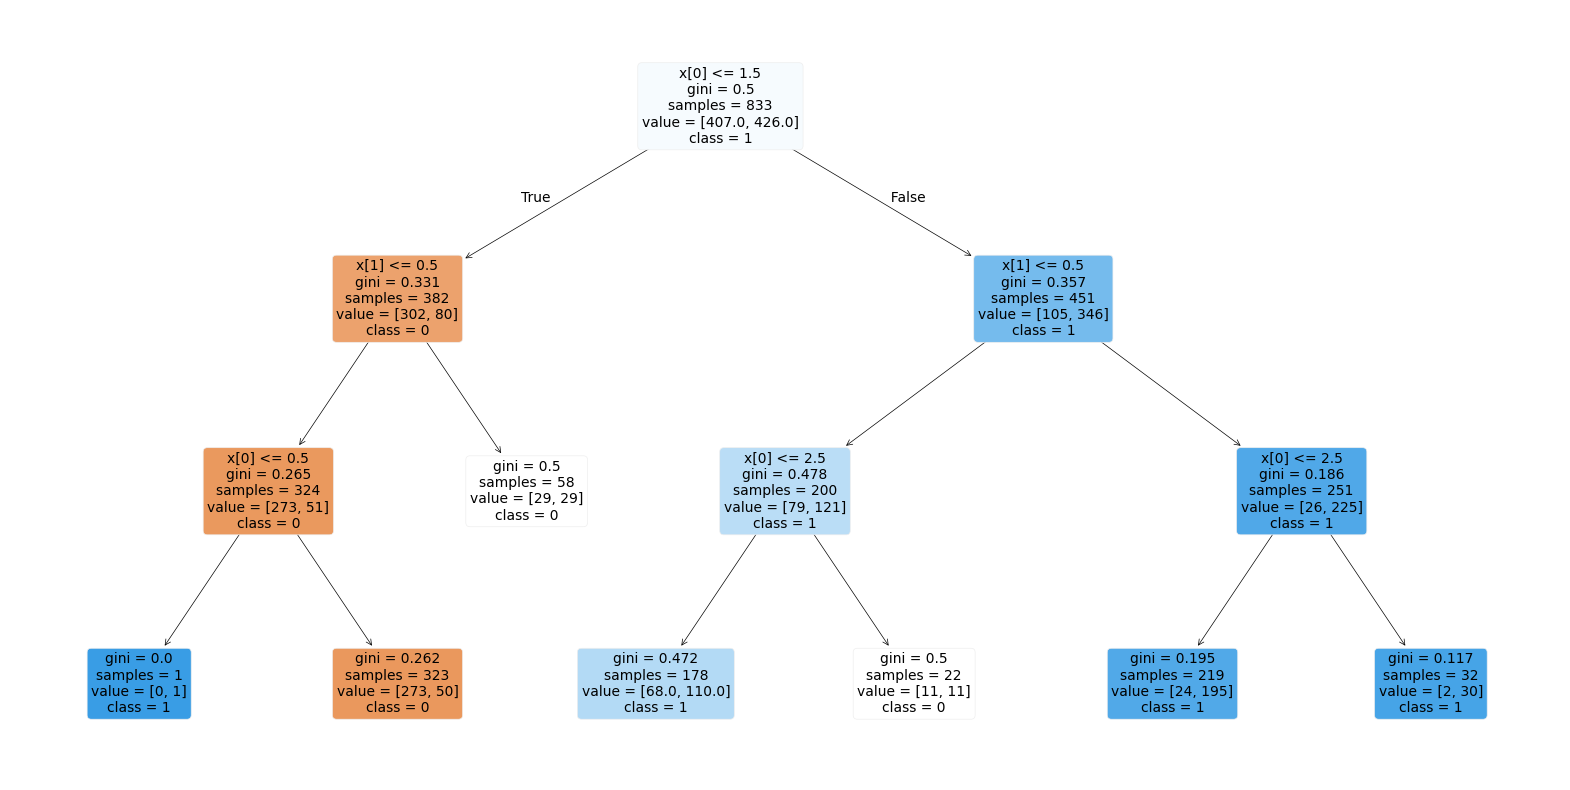

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, 
               feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
               class_names=[str(c) for c in best_clf.classes_],
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

## Conclusion

- **ST Slope** (`x[0]`) is the most important initial predictor. A value ≤ 1.5 serves as the primary split for all 833 patients.
- **Exercise Angina** (`x[1]`) forms the second level of decision-making. When combined with ST slope information, it significantly improves classification accuracy.
- Patients with:
  - ST slope values ≤ 1.5  **AND** exercise angina ≤ 0.5  have a high likelihood of heart disease (**class 0**).

### Node Color Legend

- 🟧 **Orange nodes**: Represent regions where the decision tree predicts **class 0 (healthy)**  
- 🔵 **Blue nodes**: Represent regions where the decision tree predicts **class 1 (sick)**  
- ⚪ **White nodes**: Used for nodes that have equal distribution or are not leaf nodes
